## **Big Mart Outlets**

#### **Definindo a pipeline:**
**1. Definir o Problema de Negócio**

**2. Coletar os Dados**

**3. Descrição dos Dados**

**4. Análise Inicial dos Dados**
   - **4.1 Dimensões dos Dados**
    
   - **4.2 Tipos de Dados**
     
   - **4.3 Verificação de Valores Ausentes (NA)**
     
   - **4.4 Alterar Tipo dos Dados**
    
   - **4.5 Análise Estatística**
    
   - **4.6 Cadinalidade dos dados**

 
 **5. Feature Engineering**
   - **5.1 Tratando os valores Nulos**
    
   - **5.2 Engenharia de Novas Features**

**6. Análise Exploratória dos Dados (EDA)**
   
**7. Preparação dos Dados**
   - **7.1 Codificação (Encoder)**
   - **7.2 Separando o conjunto de dados**
   - **7.3 Seleção de Features** 
   - **7.4 Escalonamento**
     
**8. Machine Learning**

 **9. Avaliação de Desempenho do Modelo**

#### 1. Definir o Problema de Negócio
A BigMart, uma rede de lojas de varejo, coletou dados de vendas de 2013 para 1559 produtos em 10 diferentes lojas localizadas em várias cidades. Os dados incluem informações sobre os produtos e as lojas, como atributos específicos que podem influenciar as vendas. No entanto, devido a possíveis falhas técnicas, algumas lojas podem não ter relatado todos os dados, resultando em valores faltantes.

O objetivo da BigMart é prever as vendas de cada produto em diferentes pontos de venda. Através dessa previsão, a empresa pretende identificar as características dos produtos e das lojas que contribuem para o aumento das vendas. Com essa análise, a BigMart poderá otimizar suas estratégias de vendas, gerenciamento de estoque e tomada de decisões operacionais.

Objetivo: Construir um modelo de Machine Learning capaz de prever com precisão as vendas de cada produto em um ponto de venda específico, utilizando os dados fornecidos.



#### 2. Coletar os Dados

- Download do Dataset no Kaggle:[Big Mart Sales Prediction Datasets](https://www.kaggle.com/datasets/shivan118/big-mart-sales-prediction-datasets)

In [2]:
# Importanto biblioteca do pandas e numpy.
import pandas as pd
import numpy as np

In [3]:
# Importando dataset de treino e teste.
train = pd.read_csv('train.csv')

#### 3. Descrição dos Dados

**Descrição das variáveis:**

- **Item_Identifier:** ID exclusivo do produto
- **Item_Weight:** Peso do produto
- **Item_Fat_Content:** Se o produto é com baixo teor de gordura ou não
- **Item_Visibility:** A porcentagem da área total de exposição de todos os produtos em uma loja alocada para o produto específico
- **Item_Type:** A categoria à qual o produto pertence
- **Item_MRP:** Preço máximo de varejo (preço de tabela) do produto
- **Outlet_Identifier:** ID exclusivo da loja
- **Outlet_Establishment_Year:**  O ano em que a loja foi estabelecida
- **Outlet_Size:** O tamanho da loja em termos de área de terreno coberta
- **Outlet_Location_Type:**  O tipo de cidade em que a loja está localizada
- **Outlet_Type:** Se o outlet é apenas um supermercado ou algum tipo de supermercado
- **Item_Outlet_Sales:** vendas do produto em uma loja específica. Esta é a variável de resultado a ser prevista.


#### 4. Análise Inicial dos Dados

**4.1 Dimensões dos Dados**

In [4]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
print('Treino:', train.shape)

Treino: (8523, 12)


**4.2 Tipos de Dados**

In [6]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**4.3 Verificação de Valores Ausentes (NA)**

In [7]:
print('Valores nulos no dataset:\n', train.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0], '\n')

Valores nulos no dataset:
 Outlet_Size    2410
Item_Weight    1463
dtype: int64 



Temos valores nulos nas colunas Outlet_Size e Outlet_Size. Em um estágio posterior, identificaremos a melhor abordagem para tratar esses valores ausentes.

**4.4 Alterar Tipo dos Dados**

Não será necessário alterar tipo de dados, pelo menos por enquanto.

**4.5 Análise Estatística**

In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**4.6 Cadinalidade dos dados**

In [9]:
train.nunique().sort_values(ascending=False)

Item_Visibility              7880
Item_MRP                     5938
Item_Outlet_Sales            3493
Item_Identifier              1559
Item_Weight                   415
Item_Type                      16
Outlet_Identifier              10
Outlet_Establishment_Year       9
Item_Fat_Content                5
Outlet_Type                     4
Outlet_Size                     3
Outlet_Location_Type            3
dtype: int64

#### 5. Feature Engineering

**5.1 Tratando os valores Nulos**

Será realizado o tratamento das colunas "Outlet_Size" e "Item_Weight", onde existem valores nulos. Para isso, serão analisadas correlações importantes para orientar o processo de preenchimento.

Iniciando pela coluna "Outlet_Size":

Uma correlação relevante para a coluna "Outlet_Size" é com a coluna "Outlet_Identifier", que representa o ID da loja. Observamos que, para as lojas com os IDs OUT010, OUT017, e OUT045, a coluna "Outlet_Size", que indica o tamanho da loja, está vazia. Em vez de substituir esses valores por outro tamanho, optarei por preenchê-los com "Desconhecido", para evitar interferências em análises futuras.


In [10]:
train.groupby('Outlet_Identifier')['Outlet_Size'].unique()

Outlet_Identifier
OUT010       [nan]
OUT013      [High]
OUT017       [nan]
OUT018    [Medium]
OUT019     [Small]
OUT027    [Medium]
OUT035     [Small]
OUT045       [nan]
OUT046     [Small]
OUT049    [Medium]
Name: Outlet_Size, dtype: object

In [11]:
# Substituindo os valores nulos da coluna "Outlet_Size" com 'Unknown'.
train.loc[train['Outlet_Size'].isna(), 'Outlet_Size'] = 'Unknown'

Agora, passarei para o tratamento da coluna "Item_Weight". Para substituir os valores nulos nesta coluna, utilizarei a coluna "Item_Identifier", já que cada identificador de item se repete no dataset. Em alguns casos, o peso do item ("Item_Weight") está preenchido para determinados identificadores, enquanto em outros não. Dessa forma, aproveitarei esses valores existentes para preencher os valores ausentes de maneira precisa, garantindo que cada identificador tenha o peso real.

In [12]:
# Realizando o preechimento.
train['Item_Weight'] = train.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [13]:
print('Valores nulos no dataset de treino:\n', train.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0], '\n')

Valores nulos no dataset de treino:
 Item_Weight    4
dtype: int64 



Como ainda restaram 4 linhas no dataset de treino , irei subtiuir esses valores nulos com a média de "Item_Weight".

In [14]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)

A próxima coluna a ser tratada é "Item_Fat_Content", que indica se o produto é "Low Fat" ou não. No entanto, essa informação foi registrada de diferentes maneiras, o que resulta em inconsistências nos dados que precisam ser padronizadas.

As inconsistências podem ser vista logo abaixo:

In [15]:
train.Item_Fat_Content .unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [17]:
fat_content_mapping = {
    'Low Fat': 'Low Fat',
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'Regular': 'Regular',
     'reg': 'Regular' 
}

train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(fat_content_mapping)

In [140]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Unknown,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


**5.2 Engenharia de Novas Features**

Criando uma coluna para categorizar a coluna "Item_Weight" (peso do item) para faciliar análises e uma possível tentativa de melhorar o modelo de machine learning mais a frente.

In [18]:
def categorize_item_weight(item_weight):
    if item_weight < 4:
        return '< 4'
    elif item_weight <= 12:
        return '<= 12'
    elif item_weight <= 16:
        return '<= 16'
    else:
        return '> 16'

In [19]:
train['Item_Weight_Category'] = train['Item_Weight'].apply(categorize_item_weight)

Será feito o mesmo para a coluna "Item_MRP" (preço de tabela).

In [21]:
def categorize_Item_MRP(Item_MRP):
    if Item_MRP < 93:
        return '< 93'
    elif Item_MRP <= 143:
        return '<= 143'
    elif Item_MRP <= 185:
        return '<= 185'
    else:
        return '> 185'

In [22]:
train['Item_MRP_Category'] = train['Item_MRP'].apply(categorize_Item_MRP)

Salvando as alterações utilizando o pickle para utilizar no modelo.

In [150]:
import pickle
with open('train.pkl', 'wb') as f:
    pickle.dump(train, f)

#### 6. Análise Exploratória dos Dados (EDA)

In [23]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Category,Item_MRP_Category
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,<= 12,> 185
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,<= 12,< 93
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,> 16,<= 143
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800,> 16,<= 185
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,<= 12,< 93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,<= 12,> 185
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Unknown,Tier 2,Supermarket Type1,549.2850,<= 12,<= 143
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,<= 12,< 93
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,<= 12,<= 143


In [24]:
# Importando biblioteca de visualização.
import matplotlib.pyplot as plt
import seaborn as sns

Irei comerça a análise exploratória das Lojas e suas varáveis.

In [25]:
Outlet_Type_Sales = train.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).reset_index()
Outlet_Type_Sales                                                                                                                 

,Outlet_Type,Item_Outlet_Sales
0,Supermarket Type1,1.291734e+07
1,Supermarket Type3,3.453926e+06
2,Supermarket Type2,1.851823e+06
3,Grocery Store,3.680343e+05


In [26]:
Outlet_Location_Type_Sales = train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).reset_index()
Outlet_Location_Type_Sales                                                                                                              

,Outlet_Location_Type,Item_Outlet_Sales
0,Tier 3,7.636753e+06
1,Tier 2,6.472314e+06
2,Tier 1,4.482059e+06


In [27]:
Outlet_Size_Sales = train.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().sort_values(ascending=False).reset_index()
Outlet_Size_Sales

,Outlet_Size,Item_Outlet_Sales
0,Medium,7.489719e+06
1,Small,4.566212e+06
2,Unknown,4.392531e+06
3,High,2.142664e+06


In [28]:
Outlet_Identifier_Sales = train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False).reset_index()
Outlet_Identifier_Sales                                                                                                               

,Outlet_Identifier,Item_Outlet_Sales
0,OUT027,3.453926e+06
1,OUT035,2.268123e+06
2,OUT049,2.183970e+06
3,OUT017,2.167465e+06
4,OUT013,2.142664e+06
5,OUT046,2.118395e+06
6,OUT045,2.036725e+06
7,OUT018,1.851823e+06
8,OUT010,1.883402e+05
9,OUT019,1.796941e+05


In [29]:
sales_by_year = train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().sort_values(ascending=False).reset_index()
sales_by_year                                                                                                                   

,Outlet_Establishment_Year,Item_Outlet_Sales
0,1985,3.633620e+06
1,2004,2.268123e+06
2,1999,2.183970e+06
3,2007,2.167465e+06
4,1987,2.142664e+06
5,1997,2.118395e+06
6,2002,2.036725e+06
7,2009,1.851823e+06
8,1998,1.883402e+05


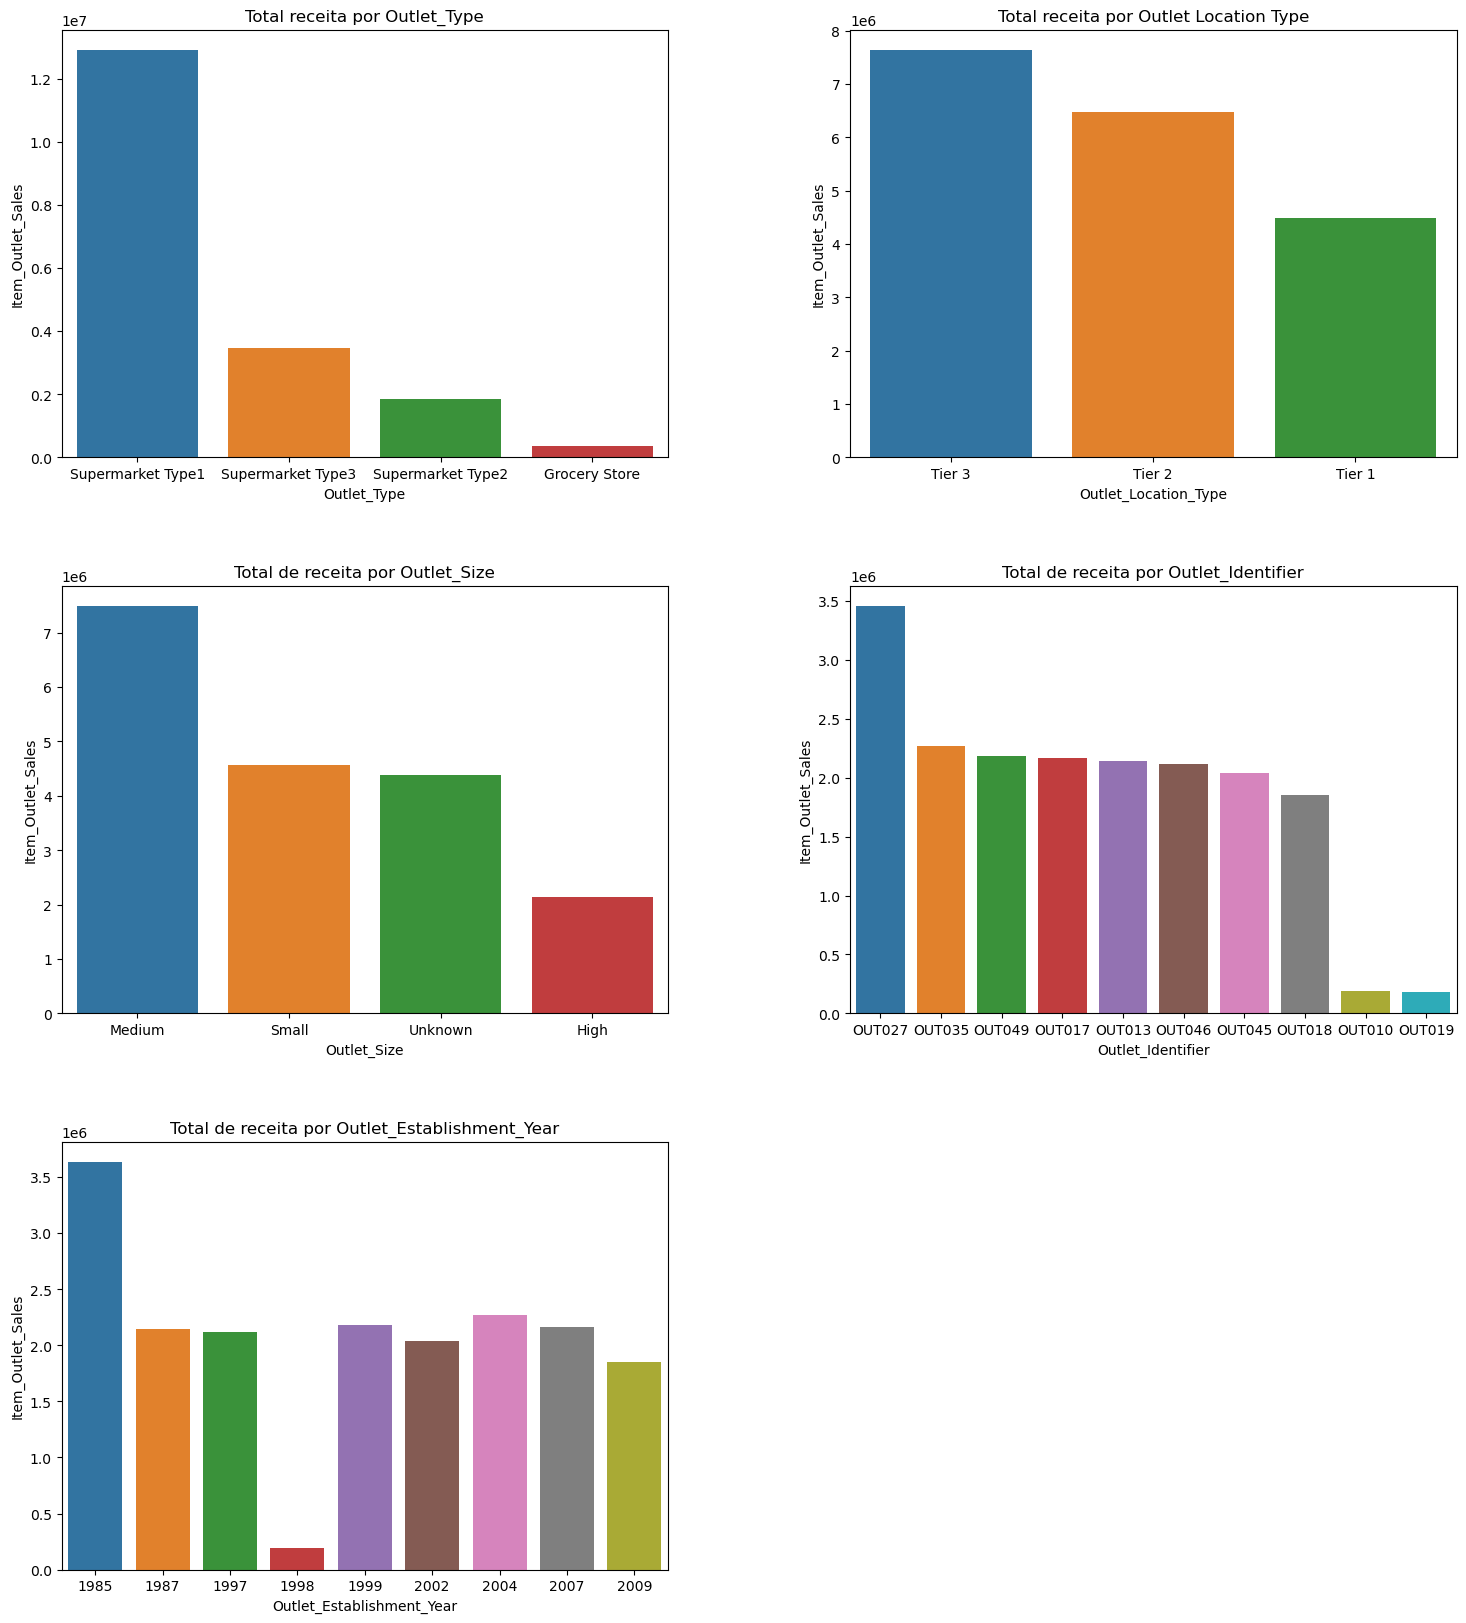

In [30]:
Outlet_Type_Sales = train.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).reset_index()
Outlet_Location_Type_Sales = train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).reset_index()
Outlet_Size_Sales = train.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().sort_values(ascending=False).reset_index()
Outlet_Identifier_Sales = train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False).reset_index()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,20))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=Outlet_Type_Sales, ax=axes[0,0])
axes[0,0].set_title('Total receita por Outlet_Type')

sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=Outlet_Location_Type_Sales, ax=axes[0,1])
axes[0,1].set_title('Total receita por Outlet Location Type')

sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=Outlet_Size_Sales, ax=axes[1,0])
axes[1,0].set_title('Total de receita por Outlet_Size')

sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=Outlet_Identifier_Sales, ax=axes[1,1])
axes[1,1].set_title('Total de receita por Outlet_Identifier')
                                                                                                                 
sns.barplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=sales_by_year , ax=axes[2,0])
axes[2,0].set_title('Total de receita por Outlet_Establishment_Year')

axes[2,1].axis('off')
                                                                                                                                             
plt.show()

Traçando as Características de cada loja.


In [31]:
unique_values = train.groupby('Outlet_Identifier').apply(
    lambda x: pd.Series({
        'Outlet_Type': list(x['Outlet_Type'].unique()),
        'Outlet_Location_Type': list(x['Outlet_Location_Type'].unique()),
        'Outlet_Size': list(x['Outlet_Size'].unique()),
        'Outlet_Establishment_Year': list(x['Outlet_Establishment_Year'].unique())
    })
).reset_index()


In [32]:
unique_values

,Outlet_Identifier,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year
0,OUT010,[Grocery Store],[Tier 3],[Unknown],[1998]
1,OUT013,[Supermarket Type1],[Tier 3],[High],[1987]
2,OUT017,[Supermarket Type1],[Tier 2],[Unknown],[2007]
3,OUT018,[Supermarket Type2],[Tier 3],[Medium],[2009]
4,OUT019,[Grocery Store],[Tier 1],[Small],[1985]
5,OUT027,[Supermarket Type3],[Tier 3],[Medium],[1985]
6,OUT035,[Supermarket Type1],[Tier 2],[Small],[2004]
7,OUT045,[Supermarket Type1],[Tier 2],[Unknown],[2002]
8,OUT046,[Supermarket Type1],[Tier 1],[Small],[1997]
9,OUT049,[Supermarket Type1],[Tier 1],[Medium],[1999]


- Podemos observar no gráfico acima que o Supermarket Type1 apresenta o melhor desempenho em vendas. No entanto, das 10 lojas existentes, 6 são deste tipo, o que contribui para o valor elevado observado.

- Além disso, as lojas localizadas em cidades de nível 3 (ou seja, cidades maiores) têm o maior volume de vendas. Em relação ao tamanho das lojas, aquelas de tamanho médio apresentam as maiores vendas, enquanto as lojas de tamanho grande estão entre as menos lucrativas. No entanto, essa tendência está relacionada à proporção dos tipos de loja.

- As lojas OUT10 e OUT19 foram as que apresentaram as menores vendas, e ambas compartilham o mesmo tipo de loja: Grocery Store(Bomboneria). Em contraste, a loja que teve um desempenho de vendas significativamente superior foi a loja OUT27, esta loja é do tipo Supermarket Type3,  localizada em uma cidade de nível 3 (Tier 3), e possui o tamanho médio.

Agora irei realizar a análise dos produtos criando visualizações.

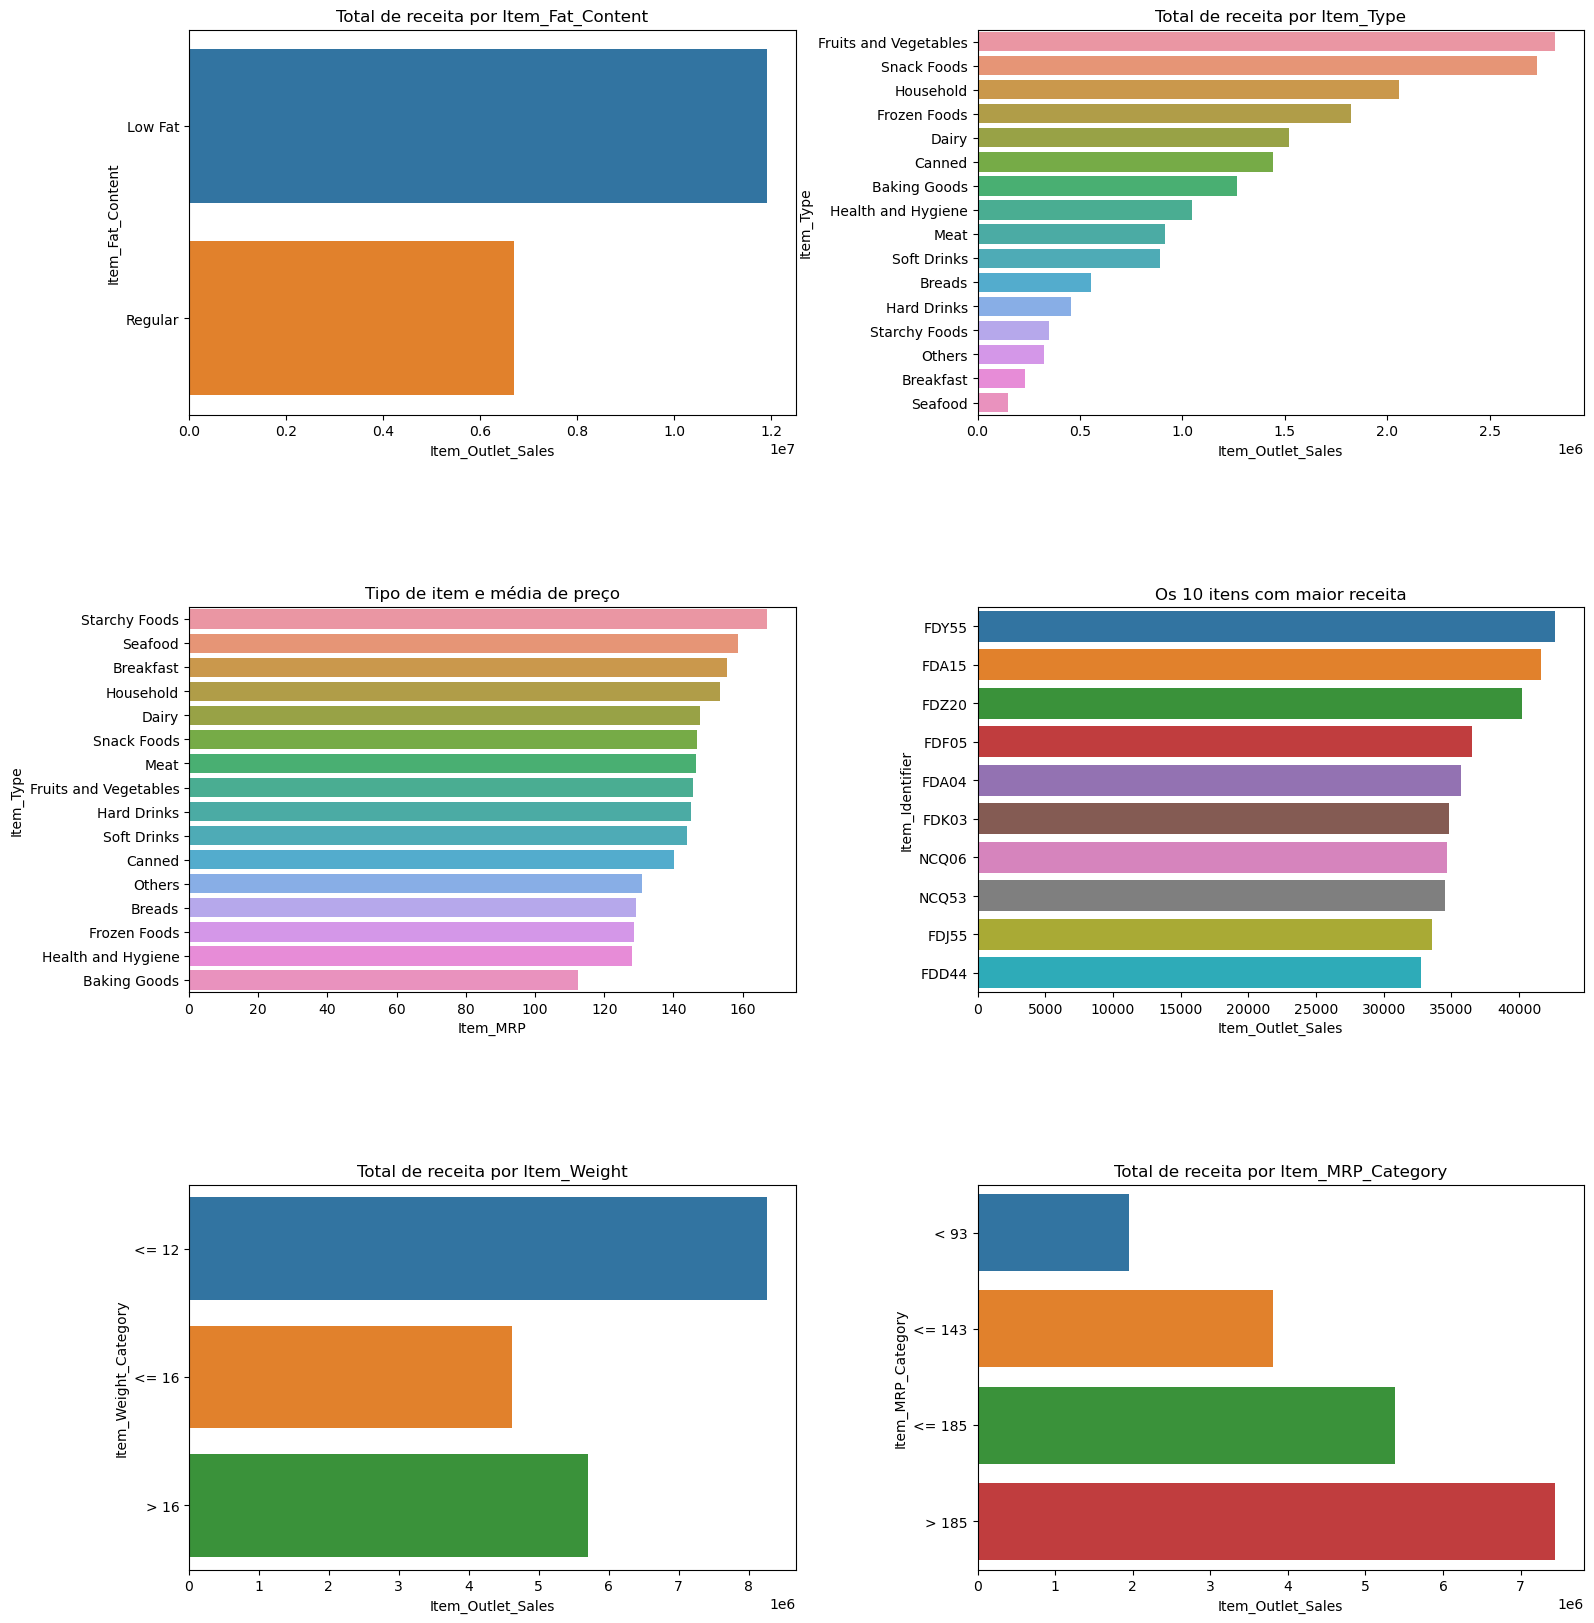

In [33]:
Item_Fat_Content_sales = train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum().sort_values(ascending=False).reset_index()
Item_Type_sales = train.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).reset_index()
Item_Identifier_sales = train.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False).reset_index().head(10)
Item_Type_median = train.groupby('Item_Type')['Item_MRP'].median().sort_values(ascending=False).reset_index()
Item_Weight_Category_sales = train.groupby('Item_Weight_Category')['Item_Outlet_Sales'].sum().reset_index()
Item_MRP_Category_sales = train.groupby('Item_MRP_Category')['Item_Outlet_Sales'].sum().reset_index()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,20))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

sns.barplot(y='Item_Fat_Content', x='Item_Outlet_Sales', data=Item_Fat_Content_sales, ax=axes[0, 0], orient='h')
axes[0, 0].set_title('Total de receita por Item_Fat_Content')

sns.barplot(y='Item_Type', x='Item_Outlet_Sales', data=Item_Type_sales, ax=axes[0, 1], orient='h')
axes[0, 1].set_title('Total de receita por Item_Type')

sns.barplot(y='Item_Type', x='Item_MRP', data=Item_Type_median, ax=axes[1, 0], orient='h')
axes[1, 0].set_title('Tipo de item e média de preço')

sns.barplot(y='Item_Identifier', x='Item_Outlet_Sales', data=Item_Identifier_sales, ax=axes[1, 1], orient='h')
axes[1, 1].set_title('Os 10 itens com maior receita')

sns.barplot(y='Item_Weight_Category', x='Item_Outlet_Sales', data=Item_Weight_Category_sales, ax=axes[2, 0], orient='h')
axes[2, 0].set_title('Total de receita por Item_Weight')

sns.barplot(y='Item_MRP_Category', x='Item_Outlet_Sales', data=Item_MRP_Category_sales, ax=axes[2, 1], orient='h')
axes[2, 1].set_title('Total de receita por Item_MRP_Category')


plt.show()

Text(0.5, 1.0, 'Item_MRP x Item_Outlet_Sales')

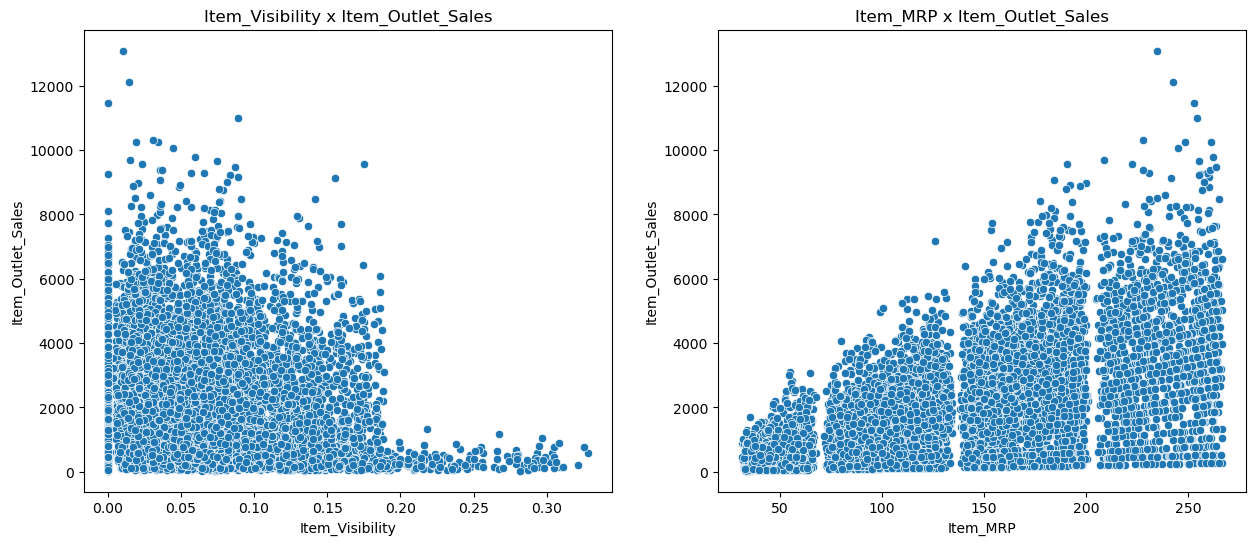

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
plt.subplots_adjust(hspace=0.2)
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=train, ax=axes[0])
axes[0].set_title('Item_Visibility x Item_Outlet_Sales')
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train, ax=axes[1])
axes[1].set_title('Item_MRP x Item_Outlet_Sales')

- Itens com baixo teor de gordura ("Low Fat") geram significativamente mais receita do que itens com teor de gordura regular ("Regular"). Isso pode indicar uma preferência dos consumidores por itens mais saudáveis ou com menos gordura.
- Os tipos de itens que mais geram receita são "Fruits and Vegetables", "Snack Foods", e "Household". Esses produtos provavelmente são mais procurados ou têm um maior volume de vendas, sugerindo que focar em campanhas de marketing ou em promoções nesses itens pode ser benéfico.
- "Seafood" está entre os itens com menor receita, o que pode indicar uma demanda menor por esse tipo de produto.
- Produtos com peso menor ou igual a 12 kg geram mais receita do que produtos mais pesados. Isso pode indicar que itens mais leves são mais populares ou vendidos em maior quantidade.
- Itens com um preço médio de venda maior que 185 geram mais receita, seguidos por itens na faixa de preço entre 143 e 185. Isso indica que produtos mais caros contribuem mais para o faturamento, sugerindo que uma estratégia de venda de itens premium pode ser lucrativa.
- A maioria dos produtos com menor visibilidade (Item_Visibility próxima de 0) tendem a ter maiores vendas (Item_Outlet_Sales). À medida que a visibilidade dos itens aumenta, as vendas tendem a diminuir, com um grande número de pontos concentrados em baixas vendas e alta visibilidade. Isso sugere que produtos com menor visibilidade vendem mais, o que pode parecer contraintuitivo. Pode haver fatores como promoções, descontos, ou o tipo de produto que influenciam essa relação

In [35]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Category,Item_MRP_Category
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,<= 12,> 185
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,<= 12,< 93
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,> 16,<= 143
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800,> 16,<= 185
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,<= 12,< 93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,<= 12,> 185
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Unknown,Tier 2,Supermarket Type1,549.2850,<= 12,<= 143
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,<= 12,< 93
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,<= 12,<= 143


Para uma análise mais aprofundada da correlação entre variáveis, utilizarei o LabelEncoder para transformar todas as variáveis categóricas em numéricas. Essa transformação será aplicada exclusivamente para fins de análise e não fará parte do pré-processamento final dos dados.

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
label_encoders = {}
categorical_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Weight_Category', 'Item_MRP_Category']     
for column in categorical_columns:
    le = LabelEncoder()
    train[column] = le.fit_transform(train[column])
    label_encoders[column] = le

In [38]:
corr = train.corr()
corr['Item_Outlet_Sales'].sort_values(ascending=False)   

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_MRP_Category            0.543764
Outlet_Type                  0.401522
Outlet_Identifier            0.162325
Outlet_Location_Type         0.089367
Item_Fat_Content             0.018719
Item_Weight_Category         0.017178
Item_Type                    0.017048
Item_Weight                  0.013165
Item_Identifier              0.002869
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Outlet_Size                 -0.172477
Name: Item_Outlet_Sales, dtype: float64

Podemos observar que a coluna  "Item_MRP" é uma correlação positiva muito forte, e nossa correlação negativa importante é a coluna "Outlet_Size". Esta informação será importante na seleção de features para o modelo de predição.         